<a href="https://colab.research.google.com/github/yslikitha/CustomerAnalysis/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

### 1.Importing datasets

In [ ]:
#load the data

# Load the data from Excel file
file_path = "champodata.xlsx"

OrderSample = pd.read_excel(file_path, sheet_name=1)
DataOrder = pd.read_excel(file_path, sheet_name=2)
DataOnSample = pd.read_excel(file_path, sheet_name=3)
DataForRecommendation = pd.read_excel(file_path, sheet_name=4)

### 2.Data Wrangling
2.a.Data Cleaning

In [ ]:
#1) Data Cleaning for Raw data order and sample
OrderSample.dtypes

OrderType                  object
OrderCategory              object
CustomerCode               object
CountryName                object
CustomerOrderNo            object
Custorderdate      datetime64[ns]
UnitName                   object
QtyRequired                 int64
TotalArea                 float64
Amount                    float64
ITEM_NAME                  object
QualityName                object
DesignName                 object
ColorName                  object
ShapeName                  object
AreaFt                    float64
dtype: object

In [ ]:
OrderSample.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


In [ ]:
# Converting values of categorical columns to 'category' dtype
categorical_cols = ['OrderType', 'OrderCategory', 'CustomerCode', 'CountryName', 'UnitName',
                    'ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName']
for col in categorical_cols:
    OrderSample[col] = OrderSample[col].astype('category')

In [ ]:
OrderSample.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    9
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [ ]:
# Identify the top 3 most frequently occurring values in 'CustomerOrderNo'
top_values = OrderSample['CustomerOrderNo'].value_counts().head(3)
print("Top 3 most frequently occurring values in 'CustomerOrderNo':")
print(top_values)


Top 3 most frequently occurring values in 'CustomerOrderNo':
12985    114
12440     93
46797     88
Name: CustomerOrderNo, dtype: int64


In [ ]:
# Get the most frequent value
most_frequent_value = top_values.index[0]
print(f"The most frequent value is: {most_frequent_value}")

# Convert 'CustomerOrderNo' to numeric if possible, otherwise to set non numeric values with NaN
OrderSample['CustomerOrderNo'] = pd.to_numeric(OrderSample['CustomerOrderNo'], errors='coerce')

# Fill NA values with the most frequent value
OrderSample['CustomerOrderNo'] = OrderSample['CustomerOrderNo'].fillna(most_frequent_value)



The most frequent value is: 12985


In [ ]:
OrderSample.isnull().sum()

OrderType          0
OrderCategory      0
CustomerCode       0
CountryName        0
CustomerOrderNo    0
Custorderdate      0
UnitName           0
QtyRequired        0
TotalArea          0
Amount             0
ITEM_NAME          0
QualityName        0
DesignName         0
ColorName          0
ShapeName          0
AreaFt             0
dtype: int64

In [ ]:
#2) Data Cleaning for data order table
DataOrder.isna().sum()

CustomerCode    0
CountryName     0
QtyRequired     0
TotalArea       0
Amount          0
ITEM_NAME       0
QualityName     0
DesignName      0
ColorName       0
ShapeName       0
AreaFt          0
AreaMtr         0
dtype: int64

In [ ]:
DataOrder.dtypes

CustomerCode     object
CountryName      object
QtyRequired       int64
TotalArea       float64
Amount          float64
ITEM_NAME        object
QualityName      object
DesignName       object
ColorName        object
ShapeName        object
AreaFt          float64
AreaMtr         float64
dtype: object

In [ ]:
# Converting values of categorical columns to 'category' dtype
categorical_cols = ['CustomerCode','CountryName','ITEM_NAME','QualityName','DesignName','ColorName','ShapeName' ]
for col in categorical_cols:
    DataOrder[col] = DataOrder[col].astype('category')
DataOrder.dtypes

CustomerCode    category
CountryName     category
QtyRequired        int64
TotalArea        float64
Amount           float64
ITEM_NAME       category
QualityName     category
DesignName      category
ColorName       category
ShapeName       category
AreaFt           float64
AreaMtr          float64
dtype: object

In [ ]:
DataOrder.describe()

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr
count,13135.000000,13135.000000,13135.000000,13135.000000,13135.000000
mean,44.460601,44.731370,2392.040164,54.622369,4.951740
std,228.749535,50.099597,16832.091080,49.072767,4.455933
min,1.000000,0.040000,0.000000,0.444400,0.040000
25%,3.000000,5.800000,163.200000,15.000000,1.350000
50%,8.000000,24.000000,590.625000,40.000000,3.600000
75%,20.000000,80.000000,1540.000000,80.000000,7.200000
max,6400.000000,1024.000000,599719.680000,645.722200,60.000000


In [ ]:
#3)Data Cleaning forDataOnSample
DataOnSample.isna().sum()

CustomerCode         0
CountryName          0
USA                 39
UK                  39
Italy               39
Belgium             39
Romania             39
Australia           39
India               39
QtyRequired          0
ITEM_NAME            0
Hand Tufted          0
Durry                0
Double Back          0
Hand Woven           0
Knotted              0
Jacquard             0
Handloom             0
Other                0
ShapeName            0
REC                  0
Round                0
Square               0
AreaFt               0
Order Conversion     0
dtype: int64

In [ ]:
DataOnSample.dtypes

CustomerCode         object
CountryName          object
USA                 float64
UK                  float64
Italy               float64
Belgium             float64
Romania             float64
Australia           float64
India               float64
QtyRequired           int64
ITEM_NAME            object
Hand Tufted           int64
Durry                 int64
Double Back           int64
Hand Woven            int64
Knotted               int64
Jacquard              int64
Handloom              int64
Other                 int64
ShapeName            object
REC                   int64
Round                 int64
Square                int64
AreaFt              float64
Order Conversion      int64
dtype: object

In [ ]:
# Converting values of categorical columns to 'category' dtype
categorical_cols = ['CustomerCode','CountryName', 'ITEM_NAME', 'Hand Tufted', 'Durry', 'Hand Woven',
    'Knotted', 'Jacquard', 'Handloom', 'Other',
    'ShapeName', 'REC', 'Round', 'Square',
    'Order Conversion', 'Double Back' ]
for col in categorical_cols:
    DataOnSample[col] = DataOnSample[col].astype('category')
DataOnSample.dtypes

CustomerCode        category
CountryName         category
USA                  float64
UK                   float64
Italy                float64
Belgium              float64
Romania              float64
Australia            float64
India                float64
QtyRequired            int64
ITEM_NAME           category
Hand Tufted         category
Durry               category
Double Back         category
Hand Woven          category
Knotted             category
Jacquard            category
Handloom            category
Other               category
ShapeName           category
REC                 category
Round               category
Square              category
AreaFt               float64
Order Conversion    category
dtype: object

In [ ]:
print(DataOnSample['USA'].value_counts())
print(DataOnSample['UK'].value_counts())
print(DataOnSample['Italy'].value_counts())
print(DataOnSample['Belgium'].value_counts())
print(DataOnSample['Romania'].value_counts())
print(DataOnSample['Australia'].value_counts())
print(DataOnSample['India'].value_counts())

0.0    4341
1.0    1440
Name: USA, dtype: int64
0.0    5578
1.0     203
Name: UK, dtype: int64
0.0    5736
1.0      45
Name: Italy, dtype: int64
0.0    5649
1.0     132
Name: Belgium, dtype: int64
0.0    5761
1.0      20
Name: Romania, dtype: int64
0.0    5771
1.0      10
Name: Australia, dtype: int64
1.0    3941
0.0    1840
Name: India, dtype: int64


In [ ]:
#Since value o has occured many items will replace the missing values with 0
columns_to_update = ['USA','UK', 'Italy', 'Belgium', 'Romania', 'Australia']

for column in columns_to_update:
    # Replace missing values with 0
    DataOnSample[column] = DataOnSample[column].fillna(0)
    # Convert the column to a categorical type
    DataOnSample[column] = DataOnSample[column].astype('category')

#Since value 1 has occured many items will replace the missing values with
DataOnSample['India']= DataOnSample['India'].fillna(1)
# Converting the column to a categorical type
DataOnSample['India'] = DataOnSample['India'].astype('category')


DataOnSample.isna().sum()

CustomerCode        0
CountryName         0
USA                 0
UK                  0
Italy               0
Belgium             0
Romania             0
Australia           0
India               0
QtyRequired         0
ITEM_NAME           0
Hand Tufted         0
Durry               0
Double Back         0
Hand Woven          0
Knotted             0
Jacquard            0
Handloom            0
Other               0
ShapeName           0
REC                 0
Round               0
Square              0
AreaFt              0
Order Conversion    0
dtype: int64

## 3.EDA

### 1.Order Category

In [ ]:
OrderSample.head()

,OrderType,OrderCategory,CustomerCode,CountryName,CustomerOrderNo,Custorderdate,UnitName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt
0,Area Wise,Order,H-1,USA,1873354.0,2017-01-16,Ft,2,6.00,12.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,6.00
1,Area Wise,Order,H-1,USA,1873354.0,2017-01-16,Ft,2,9.00,18.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,9.00
2,Area Wise,Order,H-1,USA,1873354.0,2017-01-16,Ft,2,54.00,108.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
3,Area Wise,Order,H-1,USA,1918436.0,2017-02-01,Ft,5,54.00,270.00,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,54.00
4,Area Wise,Order,H-1,USA,1873354.0,2017-01-16,Ft,5,71.25,356.25,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],BEIGE,REC,71.25


Year Range for 'Order': (2017, 2020)
Year Range for 'Sample': (2018, 2020)


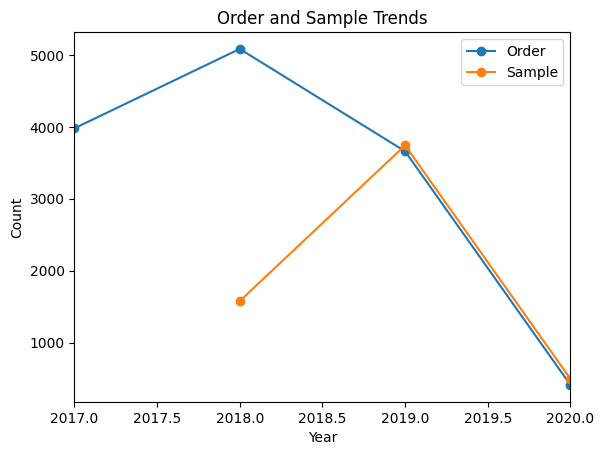

In [ ]:
import matplotlib.pyplot as plt

# Get the unique categories in the 'OrderCategory' column
categories = OrderSample['OrderCategory'].unique()
OrderSample['Year'] = OrderSample['Custorderdate'].dt.year

# Plot the data for each category separately
for category in categories:
    category_df = OrderSample[OrderSample['OrderCategory'] == category]
    year_range = (category_df['Year'].min(), category_df['Year'].max())
    print(f"Year Range for '{category}':", year_range)

    # Filter the data for the current category
    category_data = OrderSample[OrderSample['OrderCategory'] == category]

    # Plot the data
    category_data.groupby(['Year']).size().plot(kind='line', marker='o', label=category)

    # Set x-axis limits based on the year range of the current category
    plt.xlim(min(OrderSample['Year'].min(), year_range[0]), max(OrderSample['Year'].max(), year_range[1]))

# Set plot title
plt.title('Order and Sample Trends')

# Set axis labels
plt.xlabel('Year')
plt.ylabel('Count')

# Show legend
plt.legend()

# Show plot
plt.show()


### Number of orders increased from 2017 to 2018 and then decreased .There were no samples in 2017 and increased from 2018 to 2019.In the period of 2019 to 2020 there was a decrease in number of orders and samples.

### 2.Revenue generated from different types of carpets

In [ ]:
#Revenue generated from different types of carpets
DataOrder.head()

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.25,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.00,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.00,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.00,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.00,10.5300


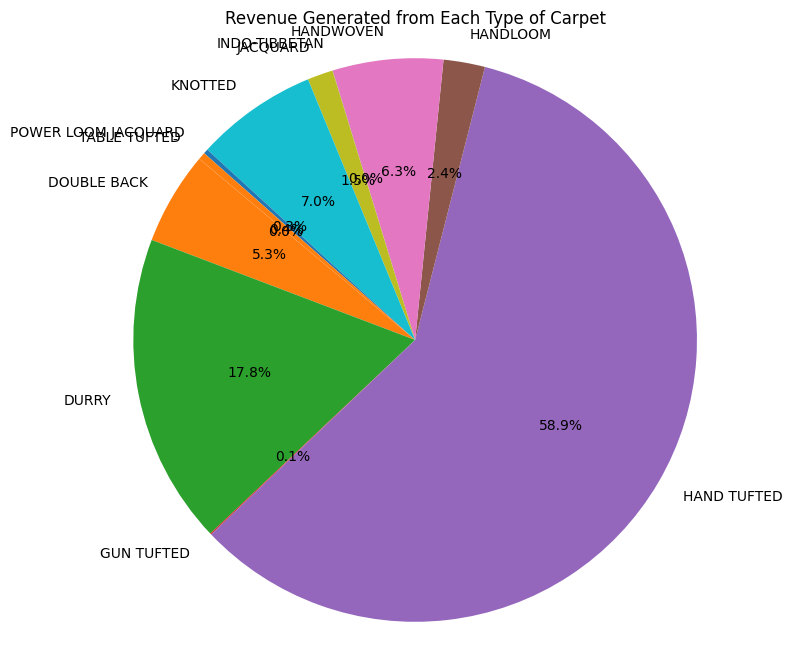

In [ ]:
# Group by 'ITEM_NAME' and sum the 'Amount' for each type of carpet
revenue_by_carpet = DataOrder.groupby('ITEM_NAME')['Amount'].sum()

# Plotting
plt.figure(figsize=(8, 8))
plt.pie(revenue_by_carpet, labels=revenue_by_carpet.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenue Generated from Each Type of Carpet')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

### Highest revenue is generated by Hand Tufted carpet type followed by durry and lowest revenue is generated by Gun Tufted

### 3.Carpet type and units sold

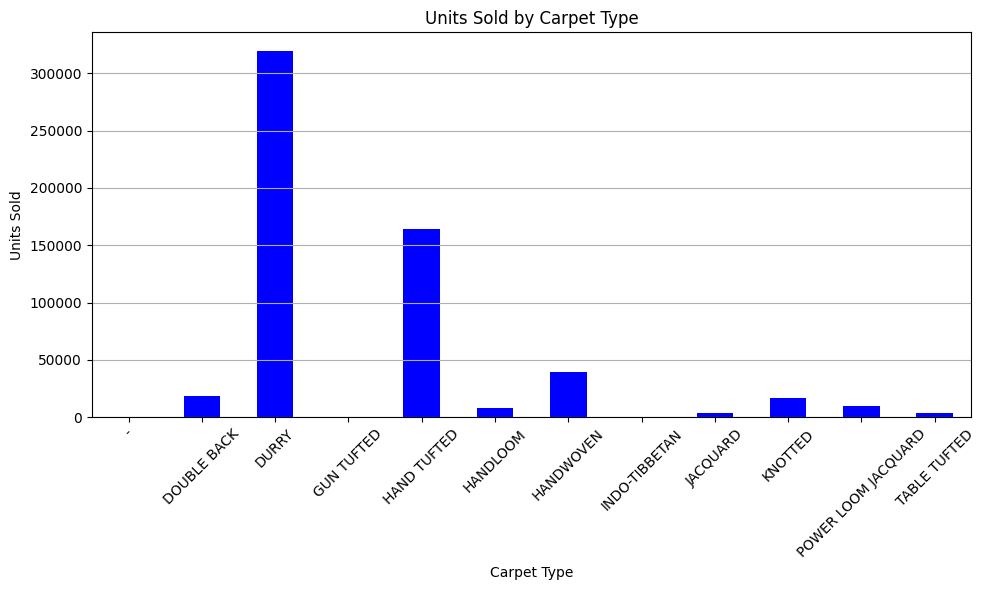

In [ ]:
# Group by 'ITEM_NAME' and sum the 'QtyRequired' for each type of carpet
units_sold_by_carpet = DataOrder.groupby('ITEM_NAME')['QtyRequired'].sum()

# Plotting
plt.figure(figsize=(10, 6))
units_sold_by_carpet.plot(kind='bar', color='blue')
plt.title('Units Sold by Carpet Type')
plt.xlabel('Carpet Type')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid lines only on y-axis
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

### Highest number of carpets is sold by Durry type but in revenues it is second largest after Hand Tufted.So number of units sold is more for Durry type than Hand Tufted.Means Durry is a cheaper than Handtufted.

### 4.Countries vs Revenue

In [ ]:
!pip install geopandas


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
print(", ".join(DataOrder['CountryName'].unique()))


USA, ITALY, UK, AUSTRALIA, SOUTH AFRICA, BELGIUM, BRAZIL, CHINA, CANADA, ROMANIA, ISRAEL, LEBANON, INDIA, UAE


In [ ]:
# Mapping dictionary to standardize country names
country_mapping = {
    'USA': 'United States of America',
    'UK': 'United Kingdom',
    'ITALY': 'Italy',
    'SOUTH AFRICA': 'South Africa',
    'UAE': 'United Arab Emirates',
    'AUSTRALIA':'Australia',
    'BELGIUM':'Belgium',
    'BRAZIL':'Brazil',
    'CHINA':'China',
    'CANADA':'Canada',
    'ROMANIA':'Romania',
    'ISREAL':'Isreal',
    'LEBANON':'Lebanon',
    'INDIA':'India',

    # Add more mappings as needed
}

# Standardize country names in DataOrder DataFrame
DataOrder['CountryName'] = DataOrder['CountryName'].map(country_mapping)



In [ ]:
DataOrder['CountryName'].unique()

array(['United States of America', 'Italy', 'United Kingdom', 'Australia',
       'South Africa', 'Belgium', 'Brazil', 'China', 'Canada', 'Romania',
       nan, 'Lebanon', 'India', 'United Arab Emirates'], dtype=object)

In [ ]:
DataOrder['CountryName'] = DataOrder['CountryName'].astype('category')

In [ ]:
DataOrder.dtypes

CustomerCode    category
CountryName     category
QtyRequired        int64
TotalArea        float64
Amount           float64
ITEM_NAME       category
QualityName     category
DesignName      category
ColorName       category
ShapeName       category
AreaFt           float64
AreaMtr          float64
dtype: object

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\3103238121.py:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


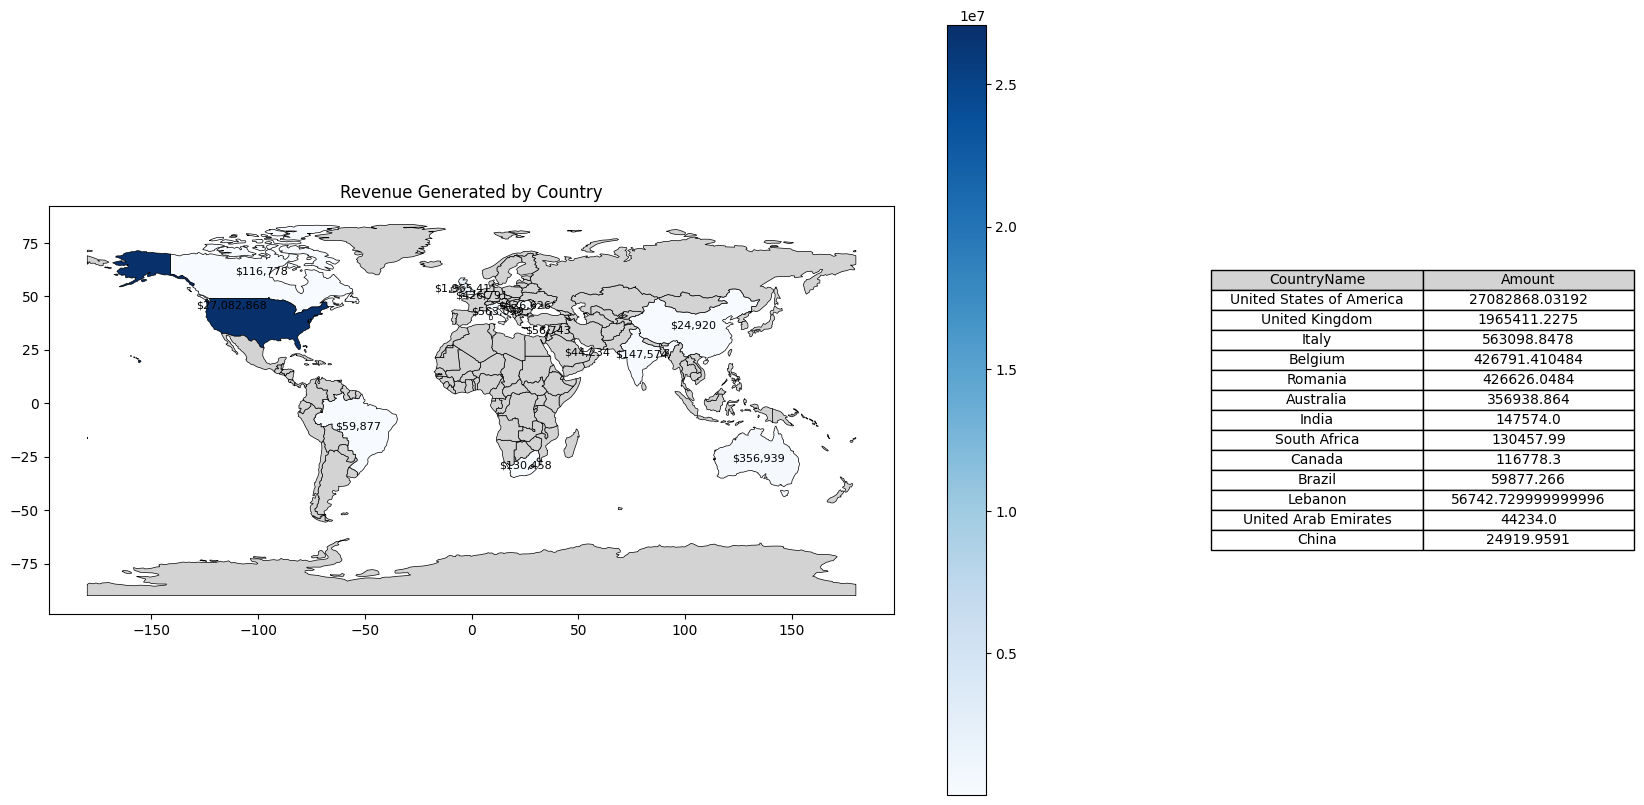

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Load world map data
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge world map data with revenue data
world = world.merge(DataOrder.groupby('CountryName')['Amount'].sum().reset_index(),
                    how='left', left_on='name', right_on='CountryName')

# Create a DataFrame for the table
revenue_by_country = DataOrder.groupby('CountryName')['Amount'].sum().reset_index()
revenue_by_country = revenue_by_country.sort_values(by='Amount', ascending=False)

# Add a new axis for the table
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10), gridspec_kw={'width_ratios': [3, 1]})
world.plot(column='Amount', ax=ax1, legend=True, cmap='Blues',
           edgecolor='black', linewidth=0.5,
           missing_kwds={'color': 'lightgrey'})

# Annotate countries with revenue information
for idx, row in world.iterrows():
    if not pd.isnull(row['Amount']):
        ax1.annotate(text=f"${row['Amount']:,.0f}",
                     xy=(row.geometry.centroid.x, row.geometry.centroid.y),
                     horizontalalignment='center', verticalalignment='center', fontsize=8)

# Set plot title
ax1.set_title('Revenue Generated by Country')

# Hide the second axis and create the table
ax2.axis('off')
table = ax2.table(cellText=revenue_by_country.values,
                  colLabels=revenue_by_country.columns,
                  cellLoc='center', loc='center', colColours=['lightgrey', 'lightgrey'])

# Adjust the table's font size and position
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Show plot
plt.show()

### Highest Revenue is generated by USA followed by UK

### 5.Revenue generated by different customers

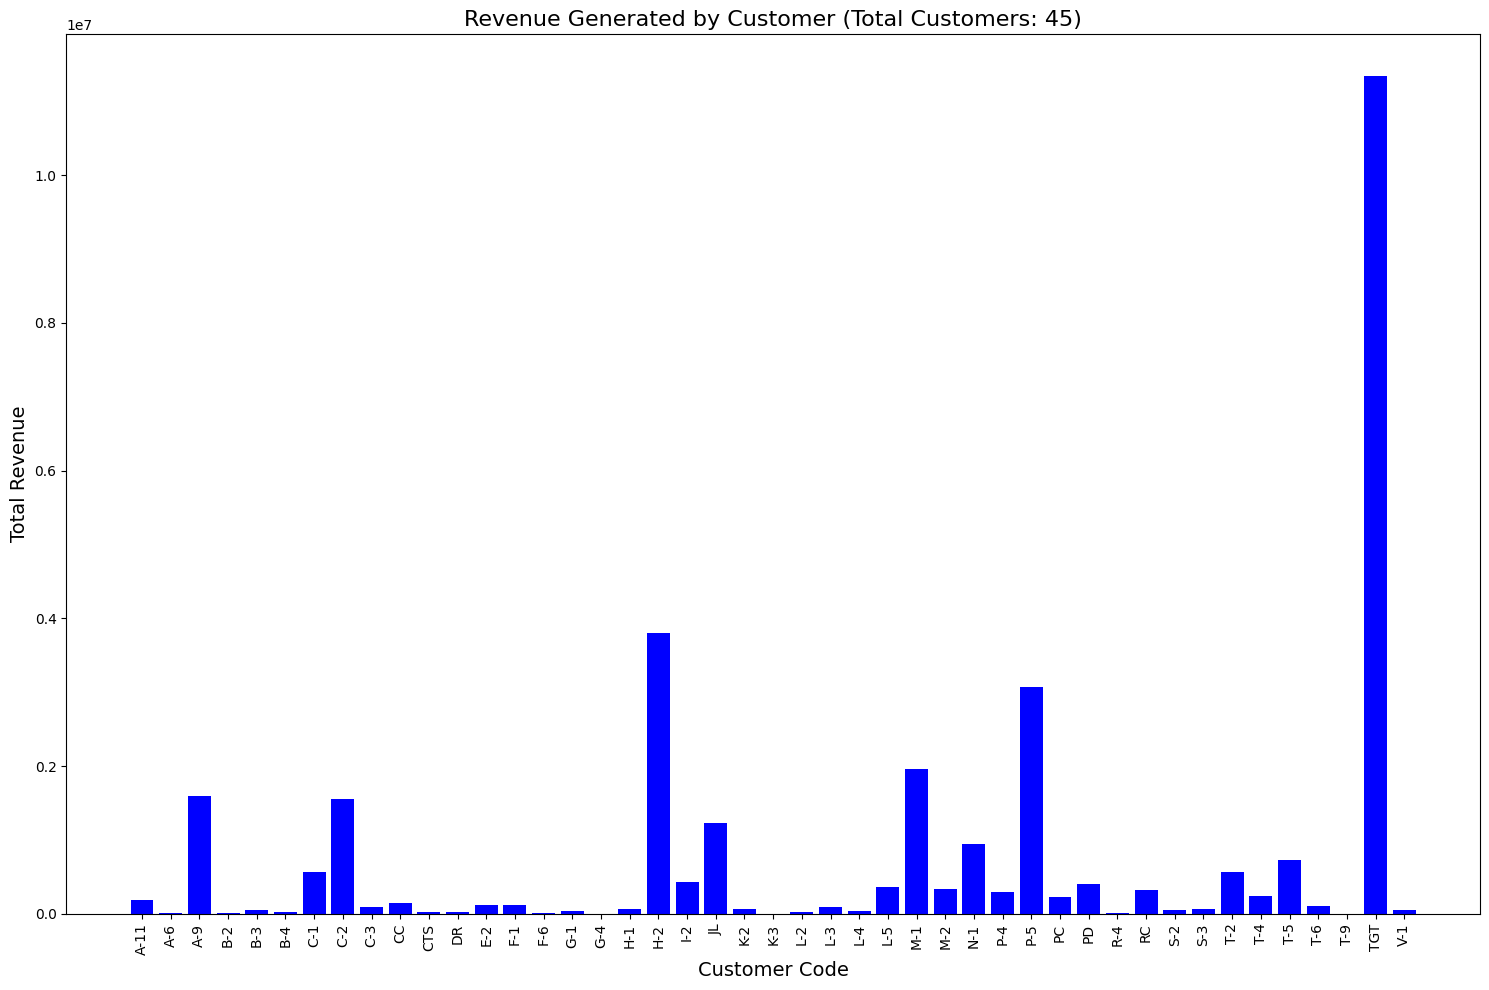

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming DataOrder is your dataframe with columns 'CustomerCode' and 'Amount'

# Group by 'CustomerCode' and sum the 'Amount' for each customer
revenue_by_customer = DataOrder.groupby('CustomerCode')['Amount'].sum().reset_index()

# Count the number of unique customers
num_customers = revenue_by_customer['CustomerCode'].nunique()

# Plotting
fig, ax = plt.subplots(figsize=(15, 10))

# Bar plot of revenue by customer
ax.bar(revenue_by_customer['CustomerCode'], revenue_by_customer['Amount'], color='blue')

# Set plot title and labels
ax.set_title(f'Revenue Generated by Customer (Total Customers: {num_customers})', fontsize=16)
ax.set_xlabel('Customer Code', fontsize=14)
ax.set_ylabel('Total Revenue', fontsize=14)

# Rotate x-axis labels for better readability if there are many customers
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()


### Highest revenue is gnerated from customer TGT .Sales from customer TGT are remarkably high the most important client

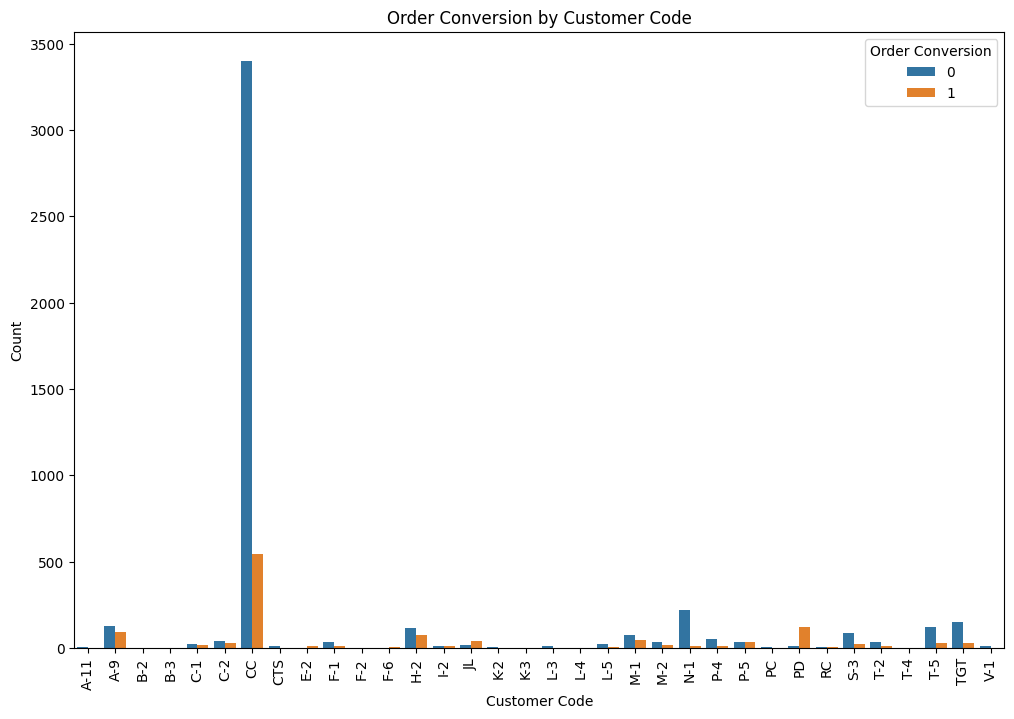

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combining CustomerCode and Order Conversion columns
customer_conversion = DataOnSample[['CustomerCode', 'Order Conversion']]

# Creating a bar plot
plt.figure(figsize=(12, 8))
sns.countplot(data=customer_conversion, x='CustomerCode', hue='Order Conversion')
plt.title('Order Conversion by Customer Code')
plt.xlabel('Customer Code')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.legend(title='Order Conversion')
plt.show()


In [ ]:
import pandas as pd

# Calculate the number of conversions for each customer
conversion_counts = DataOnSample[DataOnSample['Order Conversion'] == 1].groupby('CustomerCode').size().reset_index(name='Conversions')

# Sort the customers based on the number of conversions in descending order
sorted_conversion_counts = conversion_counts.sort_values(by='Conversions', ascending=False).reset_index(drop=True)

# Display the sorted table
print(sorted_conversion_counts)




   CustomerCode  Conversions
0            CC          541
1            PD          122
2           A-9           93
3           H-2           72
4           M-1           46
5            JL           39
6           P-5           35
7           T-5           30
8           TGT           28
9           C-2           26
10          S-3           22
11          M-2           17
12          C-1           16
13          N-1           12
14          P-4           12
15          F-1           12
16          E-2           12
17          T-2           10
18          I-2            9
19          F-6            4
20           RC            3
21          L-5            3
22          T-4            1
23         A-11            1
24          L-3            1
25          F-2            1
26          V-1            1
27           PC            0
28          L-4            0
29          K-3            0
30          K-2            0
31          CTS            0
32          B-3            0
33          B-

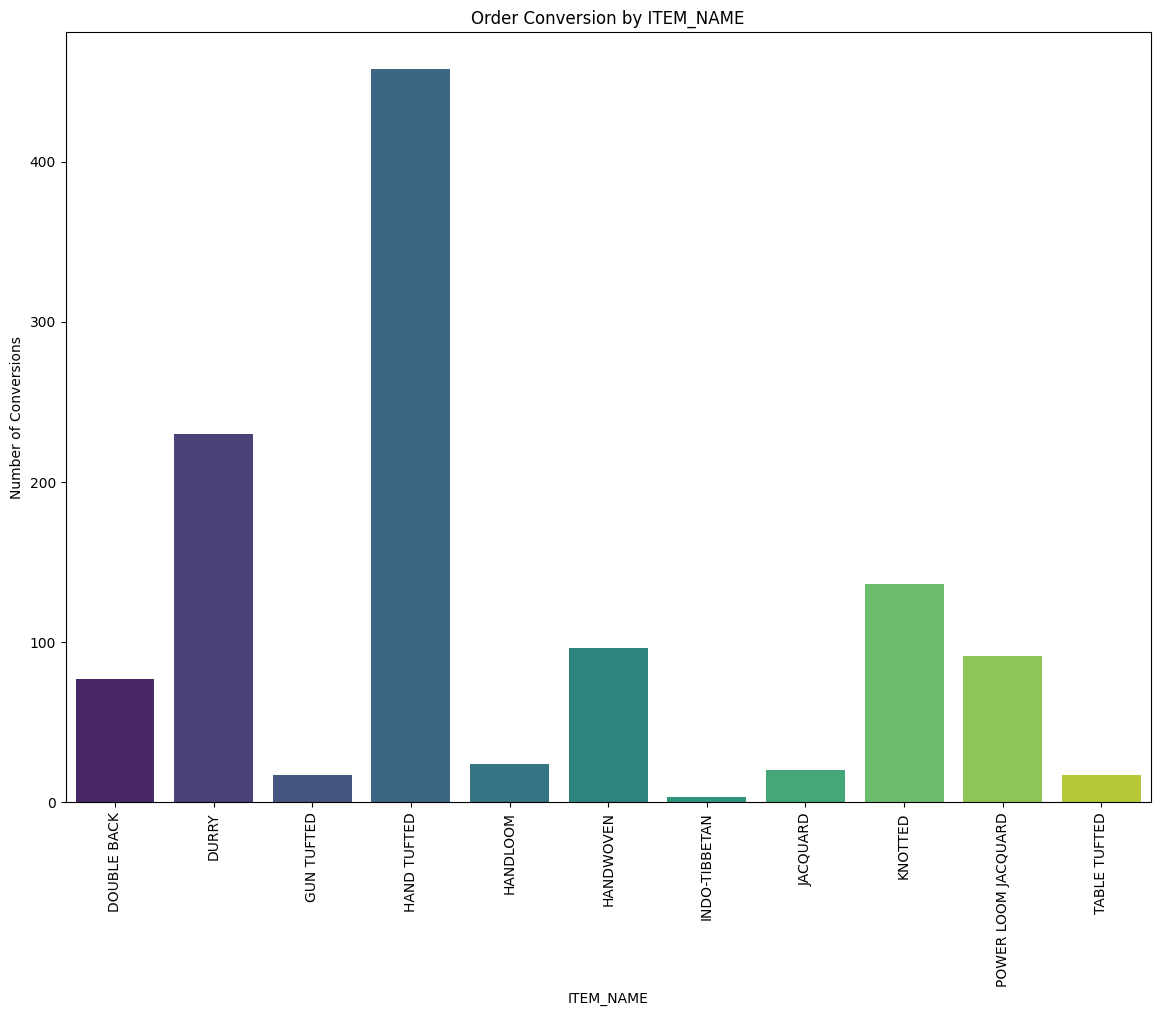

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'DOUBLE BACK'),
  Text(1, 0, 'DURRY'),
  Text(2, 0, 'GUN TUFTED'),
  Text(3, 0, 'HAND TUFTED'),
  Text(4, 0, 'HANDLOOM'),
  Text(5, 0, 'HANDWOVEN'),
  Text(6, 0, 'INDO-TIBBETAN'),
  Text(7, 0, 'JACQUARD'),
  Text(8, 0, 'KNOTTED'),
  Text(9, 0, 'POWER LOOM JACQUARD'),
  Text(10, 0, 'TABLE TUFTED')])

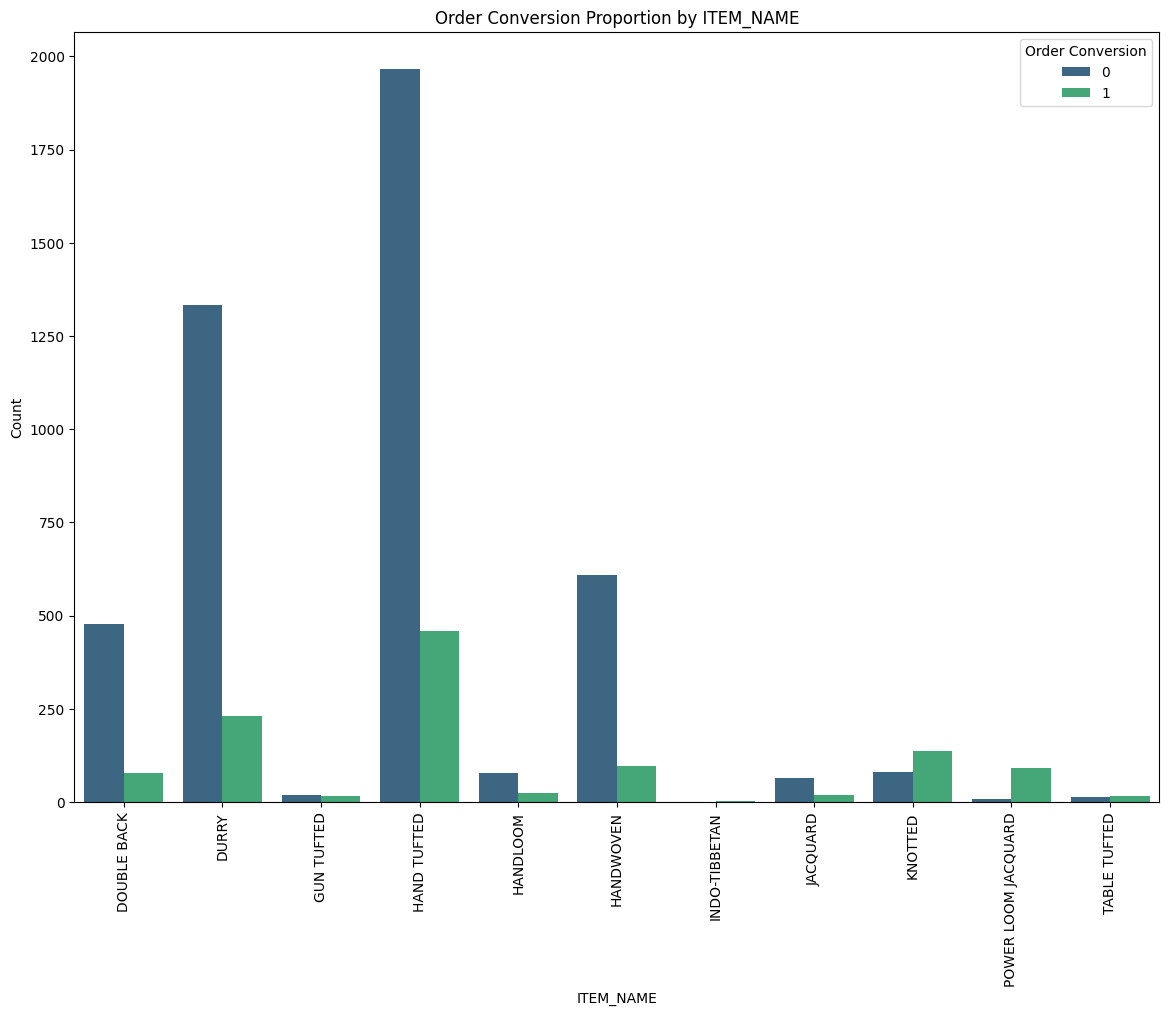

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.float=np.float_
# Sample data (replace with your actual DataFrame)
# DataOnSample = pd.read_csv('your_data.csv')

# Convert 'Order Conversion' to binary if it's not already (0 for Not Converted, 1 for Converted)
# DataOnSample['Order Conversion'] = DataOnSample['Order Conversion'].apply(lambda x: 1 if x == 'Converted' else 0)

# Calculate the number of conversions for each item type
conversion_counts = DataOnSample[DataOnSample['Order Conversion'] == 1].groupby('ITEM_NAME').size().reset_index(name='Conversions')

# Bar plot to show Order Conversion by ITEM_NAME
plt.figure(figsize=(14, 10))
sns.barplot(data=conversion_counts, x='ITEM_NAME', y='Conversions', palette='viridis')
plt.title('Order Conversion by ITEM_NAME')
plt.xlabel('ITEM_NAME')
plt.ylabel('Number of Conversions')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

# Additional plot to show Order Conversion proportion by ITEM_NAME
plt.figure(figsize=(14, 10))
sns.countplot(data=DataOnSample, x='ITEM_NAME', hue='Order Conversion', palette='viridis')
plt.title('Order Conversion Proportion by ITEM_NAME')
plt.xlabel('ITEM_NAME')
plt.ylabel('Count')
plt.xticks(rotation=90)  # Rot


## Model Development

In [ ]:
DataOnSample.head()

,CustomerCode,CountryName,USA,UK,Italy,Belgium,Romania,Australia,India,QtyRequired,...,Knotted,Jacquard,Handloom,Other,ShapeName,REC,Round,Square,AreaFt,Order Conversion
0,CC,INDIA,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
1,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
2,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2,...,0,0,0,0,REC,1,0,0,80.0,1
3,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1
4,M-1,USA,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,...,0,0,0,0,REC,1,0,0,80.0,1


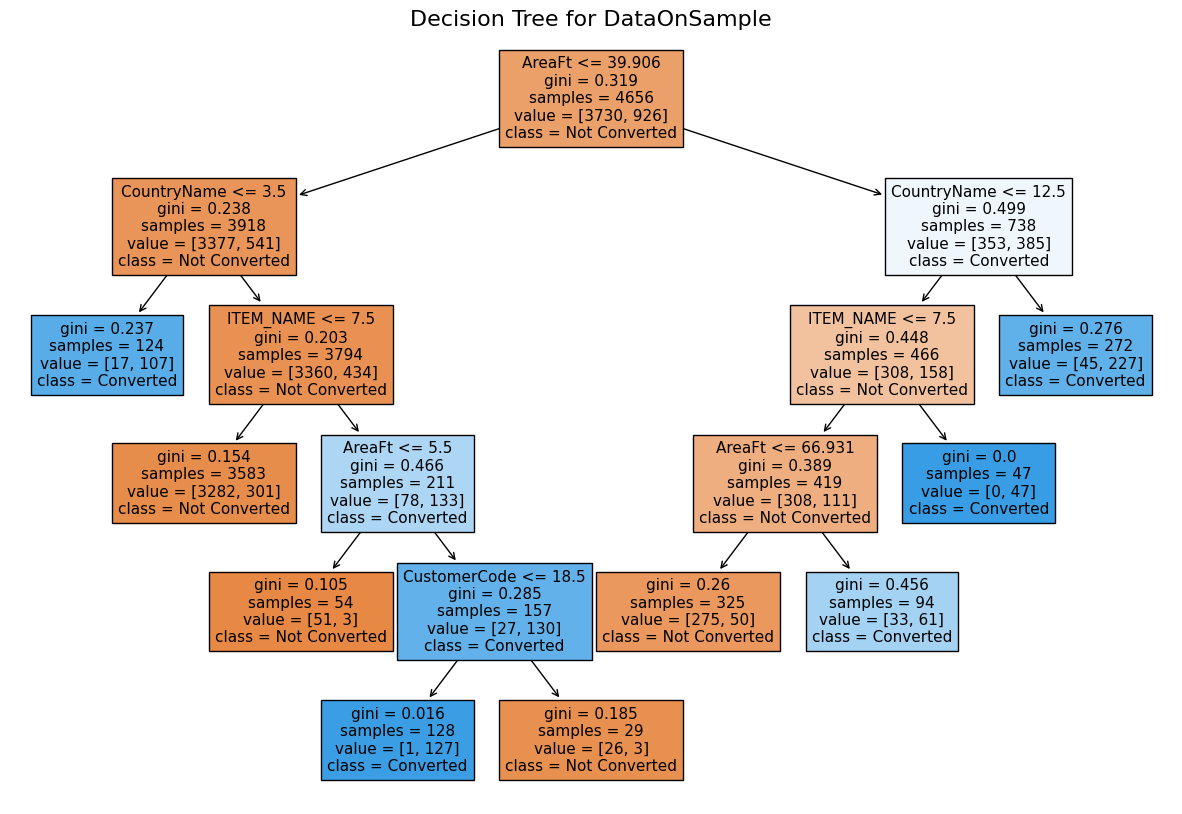

Accuracy: 0.884020618556701
Confusion Matrix:
 [[890  31]
 [104 139]]
Classification Report:
                precision    recall  f1-score   support

Not Converted       0.90      0.97      0.93       921
    Converted       0.82      0.57      0.67       243

     accuracy                           0.88      1164
    macro avg       0.86      0.77      0.80      1164
 weighted avg       0.88      0.88      0.88      1164



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# List of columns to drop
columns_to_drop = ['Order Conversion', 'USA', 'UK', 'Italy', 'Belgium', 'Romania', 'Australia',
                   'India', 'Hand Tufted', 'Durry', 'Double Back',
                   'Hand Woven', 'Knotted', 'Jacquard', 'Handloom', 'Other',
                   'REC', 'Round', 'Square']

# Separate features and target variable
X = DataOnSample.drop(columns=columns_to_drop)
y = pd.DataFrame(DataOnSample['Order Conversion'], columns=['Order Conversion'])

# Identify categorical columns
categorical_cols = ['CustomerCode', 'ITEM_NAME', 'ShapeName', 'CountryName']

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the categorical columns
X_encoded = X[categorical_cols].apply(encoder.fit_transform)

# Combine the encoded columns with the rest of the dataframe
X_rest = X.drop(columns=categorical_cols)
X_final = pd.concat([X_rest.reset_index(drop=True), X_encoded], axis=1)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=122)

# Creating the decision tree classifier
tree = DecisionTreeClassifier(min_samples_split=14, min_samples_leaf=10, max_depth=20, ccp_alpha=0.005)
tree.fit(X_train, y_train.values.ravel())

# Visualizing the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree, feature_names=X_train.columns, class_names=['Not Converted', 'Converted'], filled=True)
plt.title("Decision Tree for DataOnSample", fontsize=16)
plt.show()

# Predict on the test set
y_test_pred = tree.predict(X_test)
# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)


# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=['Not Converted', 'Converted']))


In [ ]:

from sklearn.ensemble import RandomForestClassifier# Creating the random forest classifier
rf = RandomForestClassifier(n_estimators=100, min_samples_split=14, min_samples_leaf=10, max_depth=20, random_state=122)
rf.fit(X_train, y_train)

# Predict on the test set
y_test_pred = rf.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=['Not Converted', 'Converted']))

C:\Users\HP\AppData\Local\Temp\ipykernel_16968\2483661856.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


Accuracy: 0.8969072164948454
Confusion Matrix:
 [[889  32]
 [ 88 155]]
Classification Report:
                precision    recall  f1-score   support

Not Converted       0.91      0.97      0.94       921
    Converted       0.83      0.64      0.72       243

     accuracy                           0.90      1164
    macro avg       0.87      0.80      0.83      1164
 weighted avg       0.89      0.90      0.89      1164



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Creating the Gradient Boosting classifier
gbc = GradientBoostingClassifier(n_estimators=100, max_depth=20, learning_rate=0.1, min_samples_split=14, min_samples_leaf=10, random_state=122)
gbc.fit(X_train, y_train)

# Predict on the test set
y_test_pred = gbc.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Confusion matrix for the test set
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report for more detailed metrics
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=['Not Converted', 'Converted']))

C:\Users\HP\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.9132302405498282
Confusion Matrix:
 [[893  28]
 [ 73 170]]
Classification Report:
                precision    recall  f1-score   support

Not Converted       0.92      0.97      0.95       921
    Converted       0.86      0.70      0.77       243

     accuracy                           0.91      1164
    macro avg       0.89      0.83      0.86      1164
 weighted avg       0.91      0.91      0.91      1164



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Creating the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Training the logistic regression model
log_reg.fit(X_train, y_train.values.ravel())

# Predicting on the test set
y_test_pred = log_reg.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_test_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred, target_names=['Not Converted', 'Converted']))


Accuracy: 0.8264604810996563
Confusion Matrix:
 [[889  32]
 [170  73]]
Classification Report:
                precision    recall  f1-score   support

Not Converted       0.84      0.97      0.90       921
    Converted       0.70      0.30      0.42       243

     accuracy                           0.83      1164
    macro avg       0.77      0.63      0.66      1164
 weighted avg       0.81      0.83      0.80      1164

